# RNA-seq Cell-Line Project
## Gene Ontology

### Setting up 
**Calling the necessary libraries:**

In [1]:
suppressMessages(suppressWarnings(library(readr)))
suppressMessages(suppressWarnings(library(gprofiler2)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(forcats)))
suppressMessages(suppressWarnings(library(stringr)))

**Calling the files:**

In [2]:
df <- read_tsv("/draft10/attilio/Joyce/cell-line_project/rpr_cell_lines/Salmon/TPM.transcripts.tsv", skip = 1, col_names = c("name", "TPM_value"), show_col_types = FALSE)


filtered_genes <- df %>%
  filter(log10(TPM_value + 1) > 1) %>%
  select(name)


head(filtered_genes)


filtered_genes <- filtered_genes$name

name
<chr>
RPRC000679-RA
RPRC003242-RA
RPRC003241-RA
RPRC003252-RA
RPRC003249-RA
RPRC003441-RA


In [3]:
# df <- read_tsv("/home5/attilio/Joyce/cell_line_project/TPM/TPM_values_with_tpm_log10.tsv", show_col_types = FALSE)

In [4]:
#filtered_genes <- df %>% filter(log10(TPM_value + 1) > 1) %>%
#select(name)
#filtered_genes %>% head
#filtered_genes <- filtered_genes$name
#write_tsv(filtered_genes, "filtered_genes.tsv")

**Start running commands:**

In [5]:
GO_cell_line  <- gost(filtered_genes, organism = "rprolixus")# as_short_link = TRUE)

In [6]:
nrow(GO_cell_line$result)
head(GO_cell_line$result)

[1] 246

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,9.241708e-32,1256,3209,857,0.26706139,0.6823248,GO:0010467,GO:BP,gene expression,6034,4160,GO:0009059
2,query_1,TRUE,8.234619e-31,1394,3209,935,0.29136803,0.6707317,GO:0009059,GO:BP,macromolecule biosynthetic process,6034,3235,"GO:0009058, GO:0043170"
3,query_1,TRUE,1.006257e-29,276,3209,237,0.07385478,0.8586957,GO:0006412,GO:BP,translation,6034,2170,"GO:0009059, GO:0010467, GO:0019538"
4,query_1,TRUE,8.967237e-28,1767,3209,1139,0.35493923,0.6445954,GO:0009058,GO:BP,biosynthetic process,6034,3234,GO:0008152
5,query_1,TRUE,5.909012e-23,329,3209,263,0.08195700,0.7993921,GO:0051641,GO:BP,cellular localization,6034,13854,"GO:0009987, GO:0051179"
6,query_1,TRUE,1.471768e-21,238,3209,199,0.06201309,0.8361345,GO:0070727,GO:BP,cellular macromolecule localization,6034,16276,"GO:0033036, GO:0051641"


In order to filter out broad terms, we'll use *term size*

**Term size** refers to the number of genes associated with a given GO term

In [7]:
result_table <- (GO_cell_line$result)
#head(result_table)

df_t <- result_table %>% 
        filter(term_size < 1000) %>% 
        mutate(source = str_remove(source, "^GO:")) %>%
                 slice_max(order_by = -log(p_value), n = 30)

head(df_t)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,7.002005e-35,256,2972,230,0.07738896,0.8984375,GO:1990904,CC,ribonucleoprotein complex,5488,4007,GO:0032991
2,query_1,TRUE,2.397507e-30,162,2972,154,0.05181696,0.9506173,GO:0005840,CC,ribosome,5488,377,GO:0043232
3,query_1,TRUE,1.006257e-29,276,3209,237,0.07385478,0.8586957,GO:0006412,BP,translation,6034,2170,"GO:0009059, GO:0010467, GO:0019538"
4,query_1,TRUE,3.126457e-28,136,3915,128,0.03269476,0.9411765,GO:0003735,MF,structural constituent of ribosome,7937,350,GO:0005198
5,query_1,TRUE,2.914838e-23,702,2972,505,0.16991925,0.7193732,GO:0043232,CC,intracellular membraneless organelle,5488,1850,"GO:0043228, GO:0043229"
6,query_1,TRUE,5.909012e-23,329,3209,263,0.08195700,0.7993921,GO:0051641,BP,cellular localization,6034,13854,"GO:0009987, GO:0051179"


**Intersection Size**: This refers to the number of genes in your input query that are annotated to a particular term. Essentially, it shows how many of your input genes are associated with the specific biological process, pathway, or other category being analyzed1.

**Recall**: This is a measure of how well the input query covers the genes annotated to a specific term. It is calculated as the ratio of the intersection size to the total number of genes annotated to that term. In other words, it indicates the proportion of relevant genes from the term that are present in your input list2.

In [8]:
df_t$term_name <- fct_reorder(df_t$term_name, df_t$recall)
#df_t

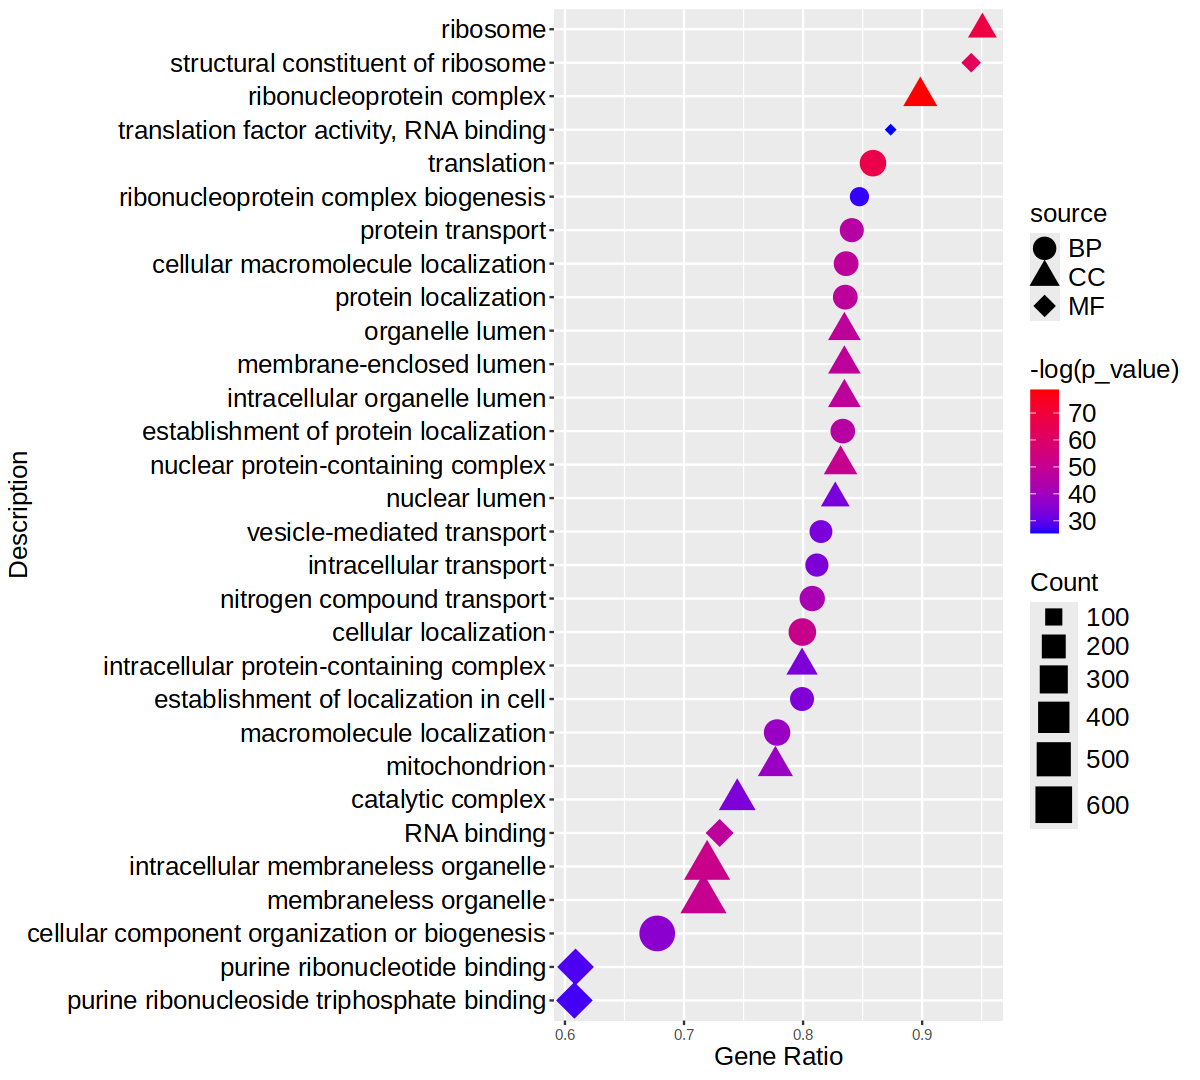

In [9]:
options(repr.plot.width = 10, repr.plot.height = 9)

go_plot <- ggplot(df_t, aes(x = recall, y = term_name)) +
    geom_point(aes(color = -log(p_value), size = intersection_size, shape = source)) +
    scale_color_gradient(low = "blue", high = "red") +
    scale_shape_manual(values = c("BP" = 16, "CC" = 17, "MF" = 18)) +  
    labs(x = "Gene Ratio", y = "Description", color = "-log(p_value)", size = "Count") +
    scale_size(range = c(3, 10)) +
#    theme_minimal() +
    theme(
        axis.text.y = element_text(size = 15, color = "black"),
        axis.title.y = element_text(size = 15),                 
        axis.title.x = element_text(size = 15),                   
        legend.title = element_text(size = 15),                   
        legend.text = element_text(size = 15) 
    )

go_plot <- go_plot + guides(shape = guide_legend(override.aes = list(size = 6)))
go_plot <- go_plot + guides(size = guide_legend(override.aes = list(shape = 15)))
#ggsave("go_plot.png", plot = go_plot, width = 10, height = 9, dpi = 100)
print(go_plot)

In [14]:
ggsave("go_plot.png", plot = go_plot, width = 10, height = 9, dpi = 100)

In [10]:
df_teste <- df_t %>%
  mutate(across(where(is.list), ~ sapply(., paste, collapse = ", ")))
write.table(df_teste, "30_GO.csv", row.names = FALSE, col.names = TRUE, sep = ",", dec = ".", qmethod = "double")

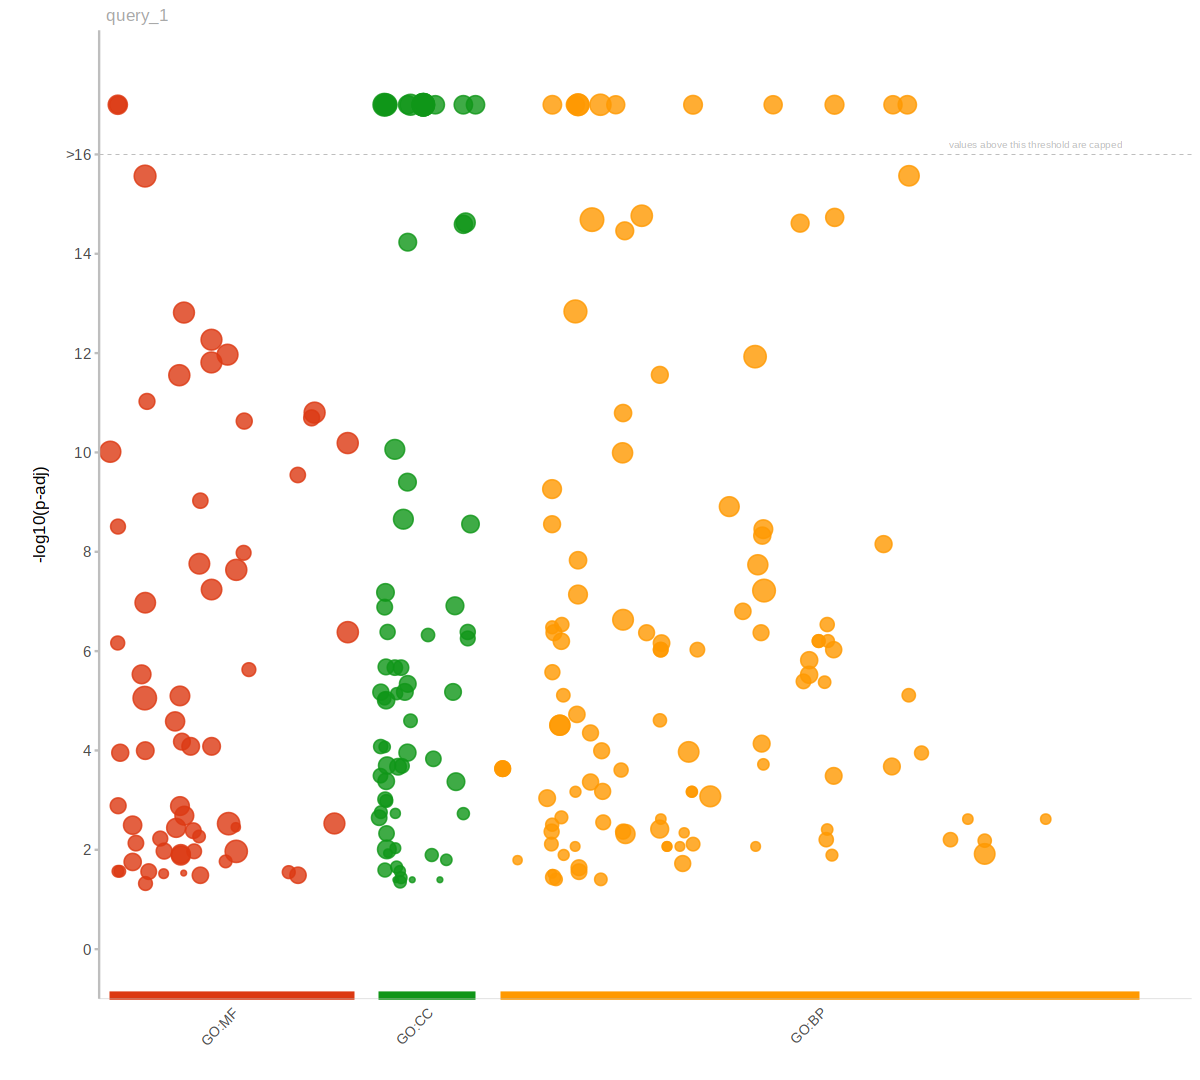

In [11]:
gostplot(GO_cell_line, interactive = FALSE)

In [12]:
#df_t
#write.csv(df_t, "30_GO.csv", row.names = FALSE)

In [13]:
contagem <- table(df_t$source)
print(contagem)


BP CC MF 
13 12  5 


--------------------------------------------------------------------------------------------